In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers
import matplotlib.pyplot as plt
from sklearn.model_selection import ParameterGrid

In [39]:
df = pd.read_excel('RJ_Reconstrucao_Moluscos_2024_06_06.xlsx')

In [8]:
df.head()

,Ano,Lula_art,Lula_ind,Lula_art_ind,Lula_oceanica_art,Calamar_ind,Polvo_art,Polvo_ind,Polvo_art_ind,Polvo_cabecinha_art,...,Mexilhao_art,Mexilhao_ind,Mexilhao_mangue_art,Caramujo_art,Caramujo_ind,Vieira_ind,Berbigao_art,Vongole_art,TOTAL_MOLLUSCS,TOTAL_GROUPS_F&M
0,1950,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,28137.0
1,1951,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,27432.0
2,1952,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,26648.0
3,1953,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,24552.0
4,1954,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,22755.0


In [52]:
df[['Lula_art', 'Lula_ind']] = df[['Lula_art', 'Lula_ind']].fillna(0)
df['Lula_sum'] = df['Lula_art'] + df['Lula_ind']
lula_total= pd.DataFrame(df[['Ano', 'Lula_sum']].values, columns=['Ano', 'Lula_total'])

print(lula_total)

       Ano  Lula_total
0   1950.0      0.0000
1   1951.0      0.0000
2   1952.0      0.0000
3   1953.0      0.0000
4   1954.0      0.0000
..     ...         ...
68  2018.0     78.4235
69  2019.0     80.8258
70  2020.0     43.4189
71  2021.0     82.2118
72  2022.0     76.8663

[73 rows x 2 columns]


C:\Users\Renan\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\keras\src\layers\core\dense.py:85: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


C:\Users\Renan\AppData\Local\Temp\ipykernel_11036\1283884877.py:64: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_predicted = pd.concat([df_predicted, df_missing_years])


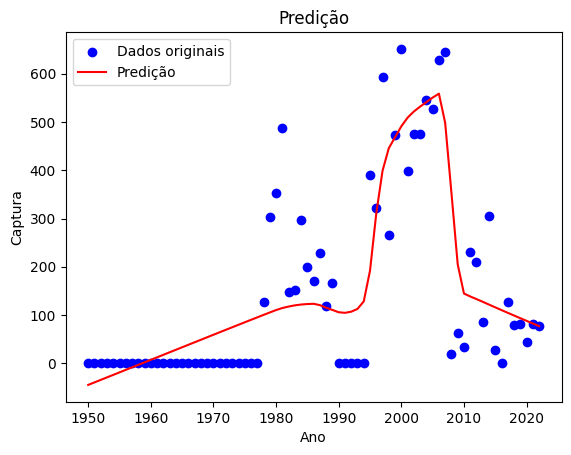

OSError: Cannot save file into a non-existent directory: 'Testes'

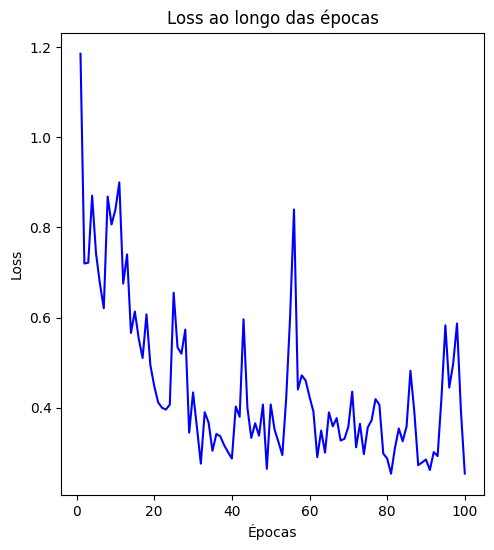

In [56]:
x = np.array(lula_total['Ano'], dtype=np.float32).reshape(-1, 1)
y = np.array(lula_total['Lula_total'], dtype=np.float32).reshape(-1, 1)

x_mean = np.mean(x)
x_std = np.std(x)
x_normalized = (x - x_mean) / x_std

y_mean = np.mean(y)
y_std = np.std(y)
y_normalized = (y - y_mean) / y_std


model = tf.keras.Sequential([
    tf.keras.layers.Dense(256, activation='leaky_relu', input_shape=(1,)),
    tf.keras.layers.Dense(128, activation='leaky_relu'),
    tf.keras.layers.Dense(64, activation='leaky_relu'),
    tf.keras.layers.Dense(32, activation='leaky_relu'),
    tf.keras.layers.Dense(1, activation='leaky_relu')
])


opt = tf.keras.optimizers.Nadam(learning_rate=0.01)  


model.compile(optimizer=opt, loss='mse', metrics=['accuracy'])


history = model.fit(x_normalized, y_normalized, epochs=100, verbose=0)


x_all = np.arange(min(x.flatten()), max(x.flatten()) + 1).reshape(-1, 1)


x_all_normalized = (x_all - x_mean) / x_std


y_all_predicted_normalized = model.predict(x_all_normalized)


y_all_predicted = y_all_predicted_normalized * y_std + y_mean


x_all = np.arange(min(x.flatten()), max(x.flatten()) + 1).reshape(-1, 1)


x_all_normalized = (x_all - x_mean) / x_std


y_all_predicted_normalized = model.predict(x_all_normalized)


y_all_predicted = y_all_predicted_normalized * y_std + y_mean


df_predicted = pd.DataFrame({'Ano': x.flatten(), 'Captura Original': y.flatten()})


df_all_predicted = pd.DataFrame({'Ano': x_all.flatten(), 'Captura Preditos': y_all_predicted.flatten()})


df_missing_years = pd.DataFrame({'Ano': np.setdiff1d(x_all.flatten(), x.flatten()), 'Captura Original': np.nan})


df_predicted = pd.concat([df_predicted, df_missing_years])


df_combined = pd.merge(df_predicted, df_all_predicted, on='Ano', how='right')


df_combined = df_combined.sort_values(by='Ano')


df_predicted = pd.DataFrame({'Ano': x.flatten(), 'Captura Original': y.flatten()})


df_all_predicted = pd.DataFrame({'Ano': x_all.flatten(), 'Captura Preditos': y_all_predicted.flatten()})



df_combined = pd.merge(df_predicted, df_all_predicted, on='Ano', how='right')


df_combined = df_combined.sort_values(by='Ano')



plt.scatter(df_combined['Ano'], df_combined['Captura Original'], color='blue', label='Dados originais')
plt.plot(df_combined['Ano'], df_combined['Captura Preditos'], color='red', label='Predição')
plt.xlabel('Ano')
plt.ylabel('Captura')
plt.title('Predição')
plt.legend()
plt.show()


loss_values = history.history['loss']
accuracy_values = history.history['accuracy']
epochs = range(1, len(loss_values) + 1)

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(epochs, loss_values, 'b')
plt.xlabel('Épocas')
plt.ylabel('Loss')
plt.title('Loss ao longo das épocas')
df_combined.to_excel('Testes/predicao_GUA.xlsx', index=False)
